In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import numpy as np
import statistics
import math



In [2]:
position = ["position_x","position_y","position_z"]
target= ["target_position_x","target_position_y","target_position_z"]
total_time = "time"

max_distance_error = 4.0

max_height_error = 3*max_distance_error/4
max_contraction_error = 1.0
feedback_types = ['Visual', 'Glove', 'Bracelets']
task_types = ["time", "1st_waypoint_time", "2nd_waypoint_time", "3rd_waypoint_time", "extension_time", "contraction_time"]
error_types = ["height_error", "x_error", "z_error", "extension_error"]
#position_x,position_y,position_z,target_position_x,target_position_y,target_position_z,time,extension,target_extension,height_error,distance_to_waypoint,extension_error,reaching_height_time

In [70]:
os.getcwd()
os.chdir('..\Bidirectional_interface\Assets\Logs')



FileNotFoundError: [WinError 3] The system cannot find the path specified: '..\\Bidirectional_interface\\Assets\\Logs'

# Arrangement of the log files in folder

In [4]:
folders = ['Raw', 'Visual', 'Glove', 'Bracelets']
for folder in folders:
    try:
        os.mkdir(folder)
    except:
        print("Folder", folder, "already existing")

Folder Raw already existing
Folder Visual already existing
Folder Glove already existing
Folder Bracelets already existing


In [198]:
def move_in_correct_folder(filename):
    if "drone" in filename :
        newfilename = "Raw" +"\\" + filename
        os.replace(filename, newfilename)    
    else:
        types_of_feedback = ["Visual", "Glove", "Bracelets"]
        for fb_type in types_of_feedback:
            if fb_type in filename :
                newfilename = fb_type +"\\" + filename
                os.replace(filename, newfilename)
                

def organise_logs():
    all_files =  glob.glob("*.csv")
    for file in all_files:  
        move_in_correct_folder(file)

        
def correct_file_length():
    for fb_type in feedback_types:
        all_files =  glob.glob(fb_type +"\\*.csv")
        for file in all_files:    
            df = pd.read_csv(file)
            for i in range(1,10):
                if math.isnan(df["target_extension"][df.index[-i]]): 
                    last_element = i
                    df = df.iloc[0:-last_element] 
            df.to_csv(file, index=False)
        
def correct_contraction_time():
    for fb_type in feedback_types:
        all_files =  glob.glob(fb_type +"\\*.csv")
        for file in all_files:
            df = pd.read_csv(file)
            total_time = df["time"].iloc[-1]
            initial_time = df["time"] [next((i for i, x in enumerate(df["3rd_waypoint_time"]) if x), None)]
            df['contraction_time'].iloc[-1] = total_time - initial_time
            df.to_csv(file, index=False)


Put the files in the correct folders

In [188]:
correct_file_length()

Nan row
Nan row
Nan row
Nan row
Nan row
Nan row
Nan row
Nan row
Nan row
Nan row
Nan row
Nan row
Nan row
Nan row
Nan row
Nan row
Nan row
Nan row
Nan row
Nan row
Nan row
Nan row
Nan row
Nan row
Nan row
Nan row
Nan row
Nan row
Nan row
Nan row
Nan row
Nan row
Nan row
Nan row
Nan row
Nan row
Nan row
Nan row
Nan row
Nan row
Nan row
Nan row
Nan row
Nan row
Nan row
Nan row
Nan row
Nan row
Nan row
Nan row


In [168]:
file = "Visual//4_27_10_sub4_Visual.csv"
df = pd.read_csv(file)
# total_time = df["time"].iloc[-1]
last_element = next((i for i, x in enumerate(df["target_extension"]) if x), None)
print(last_element)
# df.to_csv(file, index=False)


0


In [185]:
file = "Visual//8_33_04_sub11_Visual.csv"
df = pd.read_csv(file)
for i in range(1,10):
    if math.isnan(df["target_extension"][df.index[-i]]): 
        last_element = i
        df = df.iloc[0:-last_element] 
df.to_csv(file, index=False)


In [186]:
df

,position_x,position_y,position_z,target_position_x,target_position_y,target_position_z,time,extension,target_extension,1st_waypoint_time,extension_time,2nd_waypoint_time,3rd_waypoint_time,contraction_time,height_error,distance_to_waypoint,extension_error,reaching_height_time
0,-2.598000,0.455162,5.488032,0.0,0.000,0.0,0.0000,0.000000,1.5,0.00000,0.00000,0.00000,0.00000,0.0,0.000000,0.000000,0.000000,0.00000
1,-2.598000,0.461320,5.487711,-2.0,1.949,-4.0,0.0500,1.266049,1.5,0.00000,0.00000,0.00000,0.00000,0.0,-2.538680,9.506538,0.000000,0.05000
2,-2.598000,0.467080,5.487419,-2.0,1.949,-4.0,0.1000,1.266049,1.5,0.00000,0.00000,0.00000,0.00000,0.0,-2.532920,9.506247,0.000000,0.10000
3,-2.598000,0.472299,5.487153,-2.0,1.949,-4.0,0.1500,1.266048,1.5,0.00000,0.00000,0.00000,0.00000,0.0,-2.527701,9.505981,0.000000,0.15000
4,-2.598099,0.476978,5.487077,-2.0,1.949,-4.0,0.2000,1.265643,1.5,0.00000,0.00000,0.00000,0.00000,0.0,-2.523022,9.505911,0.000000,0.20000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3365,4.003391,2.949467,4.001014,4.0,1.949,4.0,168.2557,0.926534,0.9,51.09951,23.25043,93.05206,62.25281,0.0,0.000467,0.039775,-0.026534,72.94985
3366,4.003891,2.949484,4.004085,4.0,1.949,4.0,168.3057,0.928021,0.9,51.09951,23.25043,93.05206,62.25281,0.0,0.000484,0.039775,-0.028021,72.94985
3367,4.004272,2.949496,4.007025,4.0,1.949,4.0,168.3557,0.929097,0.9,51.09951,23.25043,93.05206,62.25281,0.0,0.000496,0.039775,-0.029097,72.94985
3368,4.004530,2.949504,4.009765,4.0,1.949,4.0,168.4057,0.929741,0.9,51.09951,23.25043,93.05206,62.25281,0.0,0.000504,0.039775,-0.029741,72.94985


In [200]:
correct_contraction_time()

In [189]:
organise_logs()

# Other title

In [190]:
def get_time(feedback_type, task_type):
    #task_type is a string: "1st_waypoint_time", "2nd_waypoint_time", "3rd_waypoint_time", "extension_time", "contraction_time", "time"
    time_list = []
    files = glob.glob(feedback_type+"\*.csv")
    for file in files:
        data = pd.read_csv(file)
        time_list.append(data[task_type].iloc[-1])
    return time_list




In [191]:
def plot_execution_time(task_type):
    title = task_type
    fig = plt.figure(figsize=(12, 4))
    ax = fig.add_subplot(1,3,1)
    ax.bar([0, 1,2],
       [np.mean(get_time(feedback_types[0], task_type)), np.mean(get_time(feedback_types[1], task_type)),  np.mean(get_time(feedback_types[2], task_type))],
          yerr =[np.std(get_time(feedback_types[0], task_type)), np.std(get_time(feedback_types[1], task_type)), np.std(get_time(feedback_types[2], task_type))])

    plt.xticks(range(3),feedback_types)
#     plt.ylim([0, 20])
    plt.title(title)
    
def plot_all_execution_times():
    i = 1
    for task_type in task_types:
        
        title = task_type
        if i == 1 : fig = plt.figure(figsize=(12, 4))
            
        ax = fig.add_subplot(1,3,i)
        ax.bar([0, 1,2],
           [np.mean(get_time(feedback_types[0], task_type)), np.mean(get_time(feedback_types[1], task_type)),  np.mean(get_time(feedback_types[2], task_type))],
              yerr =[np.std(get_time(feedback_types[0], task_type)), np.std(get_time(feedback_types[1], task_type)), np.std(get_time(feedback_types[2], task_type))])

        plt.xticks(range(3),feedback_types)
    #     plt.ylim([0, 20])
        plt.title(title)
        i+=1
        if i>3: i =1
            
def plot_all_boxplot_execution_time():
    for task_type in task_types:
        plot_boxplot_execution_time(task_type)

def plot_boxplot_execution_time(task_type):
    # Define styling for each boxplot component
    medianprops = {'color': 'magenta', 'linewidth': 2}
    boxprops = {'color': 'black', 'linestyle': '-', 'linewidth':2}
    whiskerprops = {'color': 'black', 'linestyle': '-'}
    capprops = {'color': 'black', 'linestyle': '-'}
    flierprops = {'color': 'black', 'marker': 'x'}
    title = task_type
 
    fig = plt.figure()
    ax = plt.axes()

    width = 0.5
    bp = plt.boxplot([get_time(feedback_types[0], task_type), get_time(feedback_types[1], task_type), get_time(feedback_types[2], task_type)], 
                     widths = width, labels = feedback_types,medianprops=medianprops,
                       boxprops=boxprops,
                       whiskerprops=whiskerprops,
                       capprops=capprops,
                       flierprops=flierprops )


    if task_type == "time": task_type = "Total " + task_type
    plt.title(task_type)
    ax.set_xlabel('Feedback type')
    ax.set_ylabel('Time [s]')

        
        
def plot_height(feedback_type):
    files = glob.glob(feedback_type+"\*.csv")
    for file in files:
        data = pd.read_csv(file)
        plt.figure()
        plt.plot(data["position_y"])
        plt.plot(data["target_position_y"]+1)
        plt.plot(data["target_position_y"]+1+np.ones(len(data["height_error"]))*0.1*max_height_error)
        plt.plot(data["target_position_y"]+1-np.ones(len(data["height_error"]))*0.1*max_height_error)
        
        plt.title("Height")
        plt.figure()
        plt.plot(data["height_error"])
        plt.plot(np.ones(len(data["height_error"]))*0.1*max_height_error)
        plt.plot(np.ones(len(data["height_error"]))*(-0.1*max_height_error))
        plt.plot(np.zeros(len(data["height_error"])))
        
def plot_x_distance(feedback_type):
    files = glob.glob(feedback_type+"\*.csv")
    for file in files:
        data = pd.read_csv(file)
        plt.figure()
        plt.plot(data["position_x"])
        plt.plot(data["target_position_x"])
        plt.plot(data["target_position_x"]+np.ones(len(data["target_position_x"]))*0.1*max_distance_error)
        plt.plot(data["target_position_x"]-np.ones(len(data["target_position_x"]))*0.1*max_distance_error)
        
        plt.title("X distance")
        plt.figure()
        plt.plot(data["target_position_x"]- data["position_x"])
        plt.plot(np.ones(len(data["target_position_x"]))*0.1*max_distance_error)
        plt.plot(np.ones(len(data["target_position_x"]))*(-0.1*max_distance_error))
        plt.plot(np.zeros(len(data["target_position_x"])))
        
def plot_z_distance(feedback_type):
    files = glob.glob(feedback_type+"\*.csv")
    for file in files:
        data = pd.read_csv(file)
        plt.figure()
        plt.plot(data["position_z"])
        plt.plot(data["target_position_z"])
        plt.plot(data["target_position_z"]+np.ones(len(data["target_position_z"]))*0.1*max_distance_error)
        plt.plot(data["target_position_z"]-np.ones(len(data["target_position_z"]))*0.1*max_distance_error)
        
        plt.title("z distance")
        plt.figure()
        plt.plot(data["target_position_z"]- data["position_z"])
        plt.plot(np.ones(len(data["target_position_z"]))*0.1*max_distance_error)
        plt.plot(np.ones(len(data["target_position_z"]))*(-0.1*max_distance_error))
        plt.plot(np.zeros(len(data["target_position_z"])))        
        

    

In [192]:
def plot_all_sub_trajectories(information_type):
    
    
    if information_type == "extension":
        max_error = max_contraction_error
    elif information_type == "position_y":
        max_error = max_height_error
    else: max_error = max_distance_error
        
    fig, ax = plt.subplots(nrows=18, ncols=3, figsize=(16,60))
    row = 0
    column = 0
    for feedback_type in feedback_types:
        files = glob.glob(feedback_types[column]+"\*.csv")
        row = 0
        for file in files:

            data = pd.read_csv(file)
            ax[row][column].plot(data[information_type])
            plt.title("test")
            if information_type == "position_y" : 
                ax[row][column].plot(data["target_"+information_type]+1)
                ax[row][column].plot(data["target_"+information_type]+1+np.ones(len(data["height_error"]))*0.1*max_error)
                ax[row][column].plot(data["target_"+information_type]+1-np.ones(len(data["height_error"]))*0.1*max_error)
            else:
                ax[row][column].plot(data["target_"+information_type])
                ax[row][column].plot(data["target_"+information_type]+np.ones(len(data["height_error"]))*0.1*max_error)
                ax[row][column].plot(data["target_"+information_type]-np.ones(len(data["height_error"]))*0.1*max_error)
            ax[row][column].set_title(feedback_type + " "+ information_type)
            row += 1
        column+=1

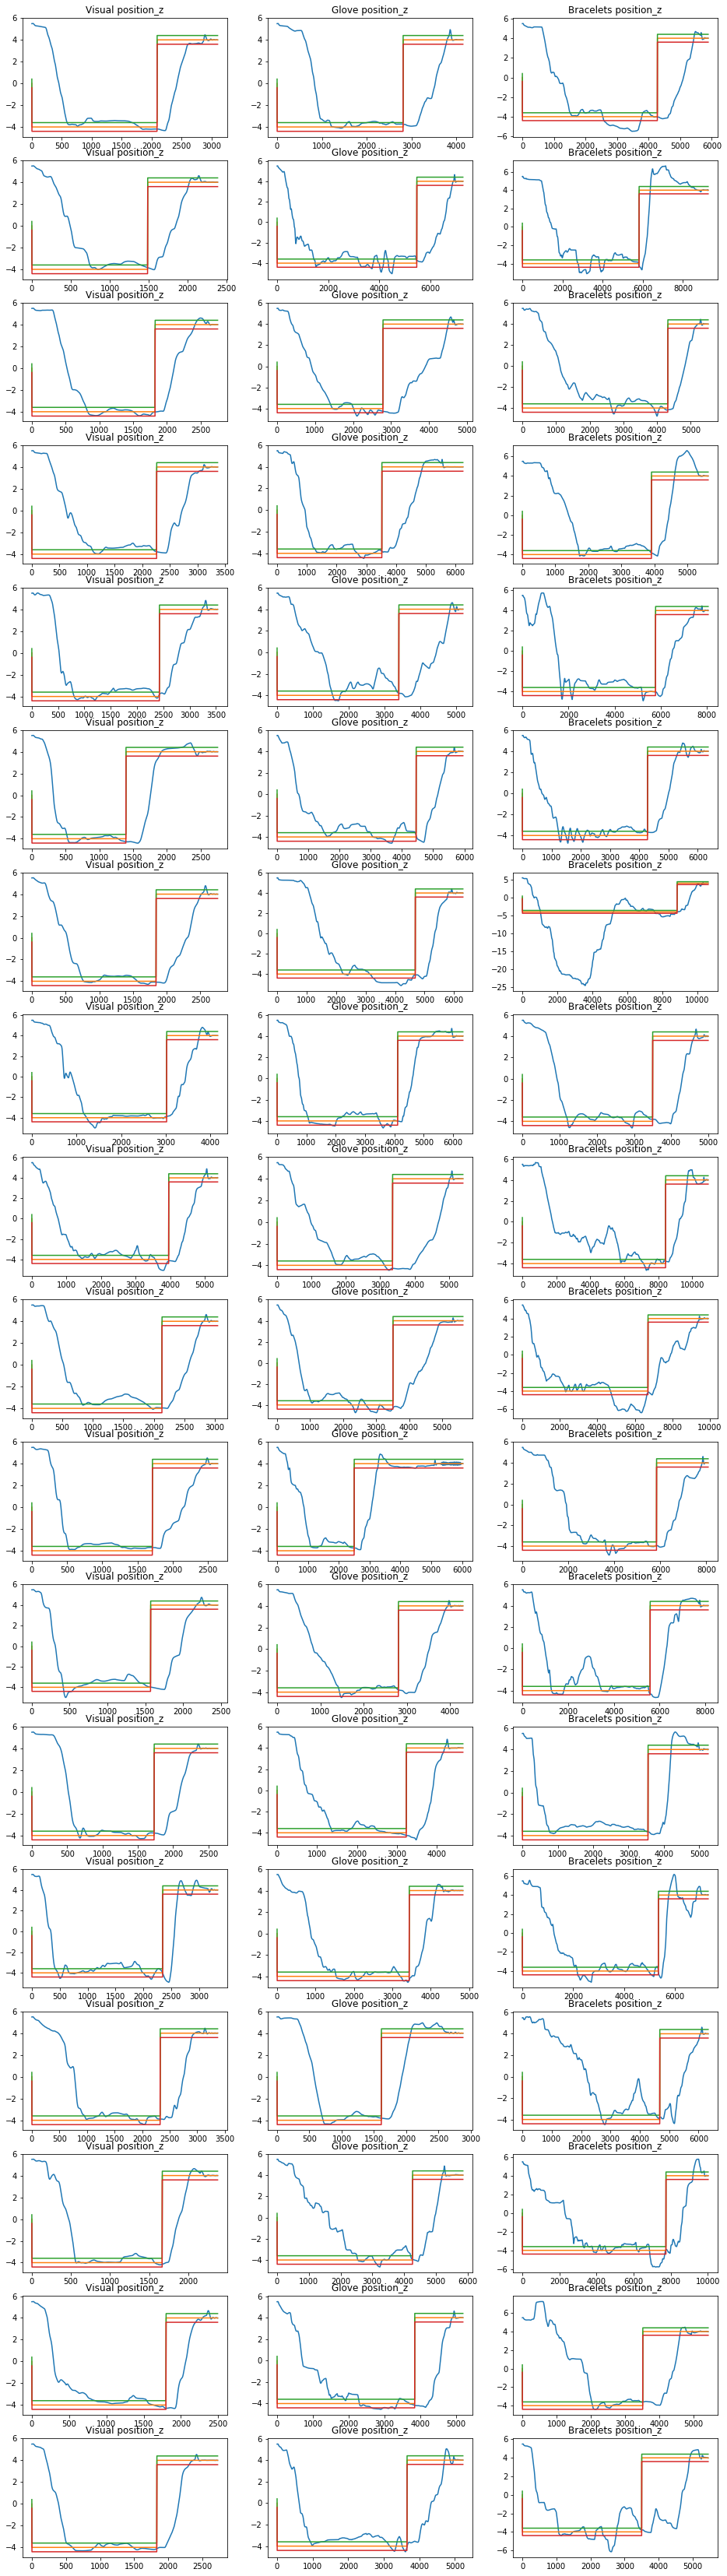

In [193]:
plot_all_sub_trajectories("position_z")

# Total distance

In [194]:
def total_distance(feedback_type):
    files = glob.glob(feedback_type+"\*.csv")
    total_distances = []
    for file in files:
        data = pd.read_csv(file)
        position_x = data["position_x"]
        position_y = data["position_y"]
        position_z = data["position_z"]
        total_distance = 0
        length = len(position_x)
        for i in range(1,length):
            delta_x = position_x[i] - position_x[i-1]
            delta_y = position_y[i] - position_y[i-1]
            delta_z = position_z[i] - position_z[i-1]
            total_distance += math.sqrt(delta_x*delta_x + delta_y*delta_y + delta_z*delta_z)
        total_distances.append(total_distance)    
            
    return total_distances

def plot_distance():    
    medianprops = {'color': 'magenta', 'linewidth': 2}
    boxprops = {'color': 'black', 'linestyle': '-', 'linewidth':2}
    whiskerprops = {'color': 'black', 'linestyle': '-'}
    capprops = {'color': 'black', 'linestyle': '-'}
    flierprops = {'color': 'black', 'marker': 'x'}
    title = "Total distance covered"
 
    fig = plt.figure()
    ax = plt.axes()

    width = 0.5
    bp = plt.boxplot([total_distance(feedback_type) for feedback_type in feedback_types], 
                     widths = width, labels = feedback_types,medianprops=medianprops,
                       patch_artist=True,  # fill with color
                       boxprops=boxprops,
                       whiskerprops=whiskerprops,
                       capprops=capprops,
                       flierprops=flierprops )
    
    colors = ['pink', 'lightblue', 'lightgreen']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)

    plt.title(title)
    ax.set_xlabel('Feedback type')
    ax.set_ylabel('Distance covered [m]')
        

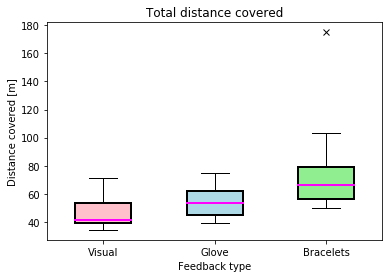

In [195]:
plot_distance()

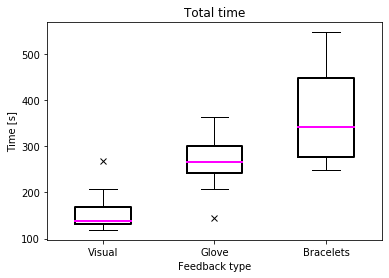

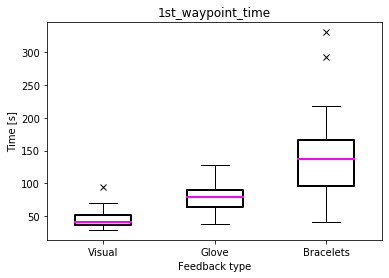

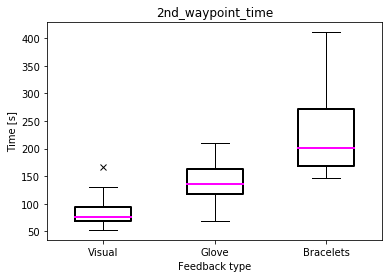

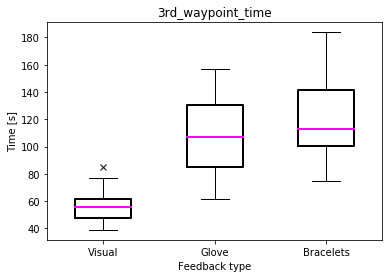

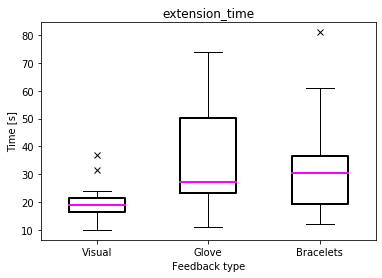

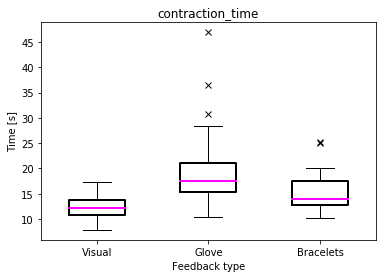

In [201]:
plot_all_boxplot_execution_time()

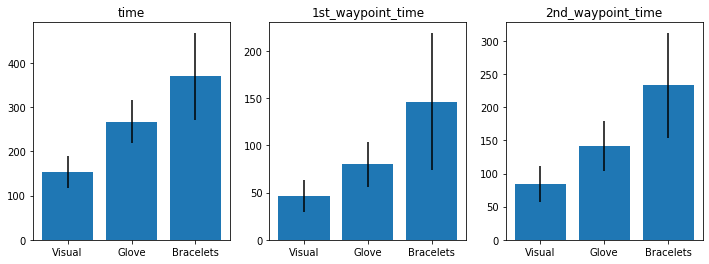

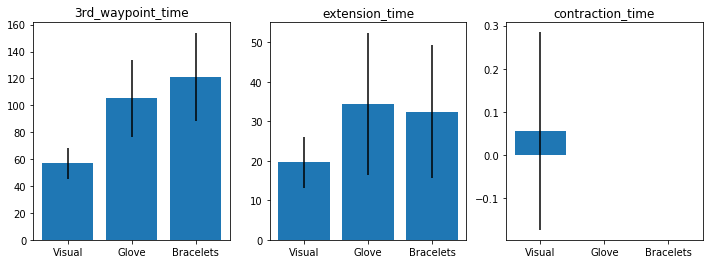

In [197]:
plot_all_execution_times()

In [19]:
def get_overshoot_count_by_type(feedback_type, error_type):
    #feedback_type : string, "Visual", "Glove", "Bracelets"
    #error_type : string, height_error, x_error, z_error, extension_error
    error_list = []
    max_error = 0
    
    overshoot_list = []
    
    files = glob.glob(feedback_type+"\*.csv")
    for file in files:
        data = pd.read_csv(file)
        if error_type == "height_error":
            error_list = data["height_error"]
            max_error = max_height_error
        elif error_type == "x_error":
            error_list = data["target_position_x"]-data["position_x"]
            max_error = max_distance_error
        elif error_type == "z_error":
            error_list = data["target_position_y"]-data["position_y"]
            max_error = max_distance_error
        elif error_type == "extension_error":
            error_list = data["extension_error"]
            max_error = max_contraction_error
        else : 
            print("incorrect error_type")
            return
        overshoot_list.append(get_overshoot_count(error_list, max_error))
        
    return overshoot_list

def get_overshoot_count(error_list, max_error):
    wasOk = False
    overshoot_count = 0
    for point in error_list:
        if point > 0.1*max_error:
            if wasOk:
                overshoot_count += 1
                wasOk = False
        elif point < -0.1*max_error:
            if wasOk:
                overshoot_count += 1
                wasOk = False
        else: wasOk = True
    return overshoot_count-1 # - 1 because at the begining, it is not an overshoot

def get_overshoot_count_mean_and_std(feedback_type, error_type):
    #feedback_type : string, "Visual", "Glove", "Bracelets"
    #error_type : string, height_error, x_error, z_error, extension_error
    error_list = []
    max_error = 0
    
    overshoot_list = []
    
    files = glob.glob(feedback_type+"\*.csv")
    for file in files:
        data = pd.read_csv(file)
        if error_type == "height_error":
            error_list = data["height_error"]
            max_error = max_height_error
        elif error_type == "x_error":
            error_list = data["target_position_x"]-data["position_x"]
            max_error = max_distance_error
        elif error_type == "z_error":
            error_list = data["target_position_y"]-data["position_y"]
            max_error = max_distance_error
        elif error_type == "extension_error":
            error_list = data["extension_error"]
            max_error = max_contraction_error
        else : 
            print("incorrect error_type")
            return
        overshoot_list.append(get_overshoot_count(error_list, max_error))
        
    return [np.mean(np.asarray(overshoot_list)), np.std(np.asarray(overshoot_list))]

def plot_overshoot( error_type):    
    mean_and_std_list =[ get_overshoot_count_mean_and_std(feedback_type, error_type) for feedback_type in feedback_types]
    fig = plt.figure(figsize=(12, 4))
    ax = fig.add_subplot(1,3,1)
    ax.bar([0, 1,2],
       [mean_and_std_list[0][0], mean_and_std_list[1][0], mean_and_std_list[2][0]],
          yerr =[mean_and_std_list[0][1], mean_and_std_list[1][1], mean_and_std_list[2][1]])

    plt.xticks(range(3),feedback_types)
    plt.ylim([0, 20])
    plt.title('Nb of overshoot for '+ error_type)
    

def plot_all_overshoot():
    i = 1
    for error_type in error_types:
        mean_and_std_list =[get_overshoot_count_mean_and_std(feedback_type, error_type) for feedback_type in feedback_types]
        if i == 1:    fig = plt.figure(figsize=(12, 4))

        ax = fig.add_subplot(1, 3, i)
        ax.bar([0, 1,2],
           [mean_and_std_list[0][0], mean_and_std_list[1][0], mean_and_std_list[2][0]],
              yerr =[mean_and_std_list[0][1], mean_and_std_list[1][1], mean_and_std_list[2][1]])

        plt.xticks(range(3),feedback_types)
        plt.ylim([0, 20])
        plt.title('Nb of overshoot for '+ error_type)    
        i+=1
        if i > 3 : i = 1

def plot_overshoot_boxplot(error_type):
    medianprops = {'color': 'magenta', 'linewidth': 2}
    boxprops = {'color': 'black', 'linestyle': '-', 'linewidth':2}
    whiskerprops = {'color': 'black', 'linestyle': '-'}
    capprops = {'color': 'black', 'linestyle': '-'}
    flierprops = {'color': 'black', 'marker': 'x'}
    title = error_type
 
    fig = plt.figure()
    ax = plt.axes()

    width = 0.5
    bp = plt.boxplot([get_overshoot_count_by_type(feedback_types[0], error_type), get_overshoot_count_by_type(feedback_types[1], error_type), get_overshoot_count_by_type(feedback_types[2], error_type)], 
                     widths = width, labels = feedback_types,medianprops=medianprops,
                       patch_artist=True,  # fill with color
                       boxprops=boxprops,
                       whiskerprops=whiskerprops,
                       capprops=capprops,
                       flierprops=flierprops )
    
    colors = ['pink', 'lightblue', 'lightgreen']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)

    plt.title(title)
    ax.set_xlabel('Feedback type')
    ax.set_ylabel('Number of overshoot')
    
def plot_all_overshoot_boxplot():
    for error_type in error_types :
        plot_overshoot_boxplot(error_type)


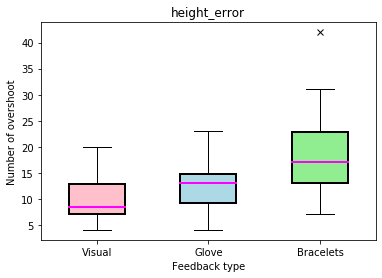

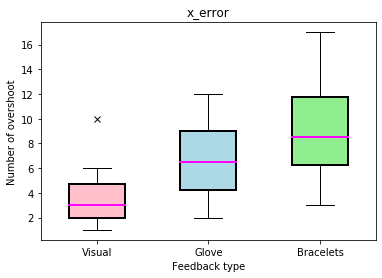

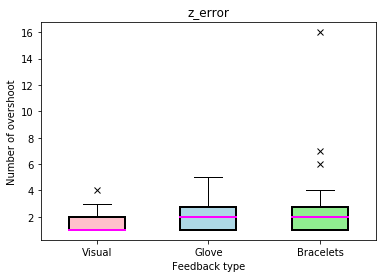

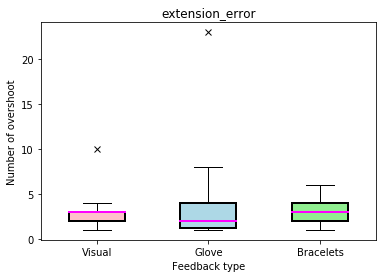

In [20]:
plot_all_overshoot_boxplot()

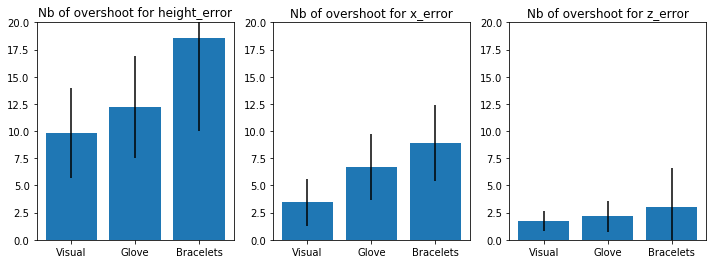

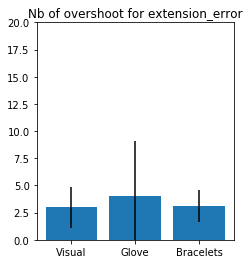

In [21]:
plot_all_overshoot()


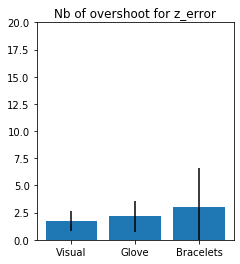

In [22]:
plot_overshoot("z_error")

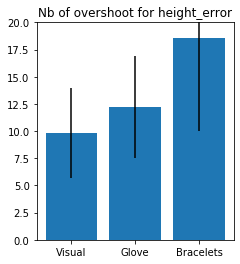

In [25]:
plot_overshoot("height_error")